In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# 텐서 만들기 텐서플로우에서 관리하는 데이타?

In [5]:
# 텐서 만들기 텐서플로우에서 관리하는 데이타?
a = tf.constant(2.0)
y = tf.constant(8.0)
x = tf.Variable(10.0)

loss = tf.math.abs(a*x - y)
print(a)
print(y)
print(x)
print(loss)

tf.Tensor(2.0, shape=(), dtype=float32)
tf.Tensor(8.0, shape=(), dtype=float32)
<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=10.0>
tf.Tensor(12.0, shape=(), dtype=float32)


2.0

In [9]:
# 스칼라 값을 가져오려면?
loss.numpy()

12.0

In [ ]:
# 내가 했던것을 테이프에 기록함? 그래야지 역전파때 미분을 할수있음. 테이프에 기록된 연산의 그레디언트를 계산.

In [6]:
def train_func():
    with tf.GradientTape() as tape:
        # a*x -> 예측값
        # y   -> 라벨
        loss = tf.math.abs(a*x-y)

    dx = tape.gradient(loss, x)  # 미분값 x 파라미터 loss 목적함수?
    print('x = {}, dx = {}'.format(x.numpy(), dx))

    # 이렇게 해도 되고
    # x = x - dx
    # 이렇게 한다 x가 업데이트? assign 은 계산한걸 자기 자신한테
    #x.assign(x-dx)
    x.assign_sub(dx)


# Run train_func() UDF repeately
for i in range(4):
    train_func()

x = 10.0, dx = 2.0
x = 8.0, dx = 2.0
x = 6.0, dx = 2.0
x = 4.0, dx = 0.0


GradientTape : https://www.tensorflow.org/guide/autodiff?hl=ko

In [14]:
%%time
# 지금 이것은 회귀문제임 그래서 MSE 로 해보자 ( 예측값 - 라벨 )
# 2차함수에 대해서 해보자
# 데이터 집합 생성
x = np.array(np.arange(-5, 5, 0.1))
y = 2*x*x + 3*x + 5  # 이런 데이터가 있다고 하자 (피피티 그래프 참조)


# 계수 설정 : 초기값
lr = 0.001

w1 = tf.Variable(1.0)
w2 = tf.Variable(1.0)
b = tf.Variable(1.0)

# 학습
histLoss = []  # 로스 기록 찍어보기 위함.
for epoch in range(10000):
    with tf.GradientTape() as tape:
        # 제곱하고 평균하는거임 근데 그냥 rmse 를 해보자
        loss = tf.sqrt(tf.reduce_mean(tf.square(w1*x*x + w2*x + b - y)))
        # 그래서 루트를 씌워야함.

    # 그다음 미분값을 구해야함.
    dw1, dw2, db = tape.gradient(loss, [w1, w2, b])

    w1.assign_sub(lr*dw1)  # w1 = w1 - lr * dw1 # 빼주는거니까 assign_sub
    w2.assign_sub(lr*dw2)  # w1 = w1 - lr * dw2
    b.assign_sub(lr*db)

    histLoss.append(loss)
    if epoch % 500 == 0:
        print("epoch = {}, loss = {}".format(epoch, loss))

epoch = 0, loss = 15.339600563049316
epoch = 500, loss = 3.654714584350586
epoch = 1000, loss = 2.3881609439849854
epoch = 1500, loss = 2.092434883117676
epoch = 2000, loss = 1.8692306280136108
epoch = 2500, loss = 1.6479506492614746
epoch = 3000, loss = 1.426693320274353
epoch = 3500, loss = 1.2054353952407837
epoch = 4000, loss = 0.9841771721839905
epoch = 4500, loss = 0.7629193067550659
epoch = 5000, loss = 0.5416615009307861
epoch = 5500, loss = 0.3204036056995392
epoch = 6000, loss = 0.09914541989564896
epoch = 6500, loss = 0.06283137202262878
epoch = 7000, loss = 0.06284035742282867
epoch = 7500, loss = 0.06293746829032898
epoch = 8000, loss = 0.06293746829032898
epoch = 8500, loss = 0.06293746829032898
epoch = 9000, loss = 0.06293746829032898
epoch = 9500, loss = 0.06293746829032898
CPU times: user 16.5 s, sys: 250 ms, total: 16.8 s
Wall time: 17.1 s



추정 결과 :
w1 = 2.01
w2 = 3.00
b = 5.00
final loss = 0.0627


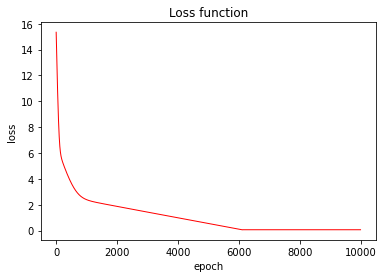

In [15]:
print("\n추정 결과 :")
print("w1 = %.2f" % w1.numpy())
print("w2 = %.2f" % w2.numpy())
print("b = %.2f" % b.numpy())
print("final loss = %.4f" % loss.numpy())

plt.plot(histLoss, color='red', linewidth=1)
plt.title("Loss function")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

# SGD + Momentum
## 방향 관성 ( 옵티마이저 ) 베타1은 모멘텀에 대한 베타2는 rmsp 에 대한
### decay 는 뭐지 ... 크기를 변경시켜줌 학습률?

In [16]:
import tensorflow as tf
from tensorflow.keras import optimizers
import numpy as np
import matplotlib.pyplot as plt

In [17]:
%%time
# y = 2x^2 + 3x + 5 일 때 x, y 집합을 생성한다
x = np.array(np.arange(-5, 5, 0.1))
y = 2 * x * x + 3 * x + 5

# 그래프를 생성한다.   
w1 = tf.Variable(1.0)
w2 = tf.Variable(1.0)
b = tf.Variable(1.0)
var_list = [w1, w2, b]  # variable list

# SGD optimizers 기능을 사용하고, Momentum 방법을 사용한다.
opt = optimizers.SGD(learning_rate=0.001, momentum=0.7, nesterov=False)

histLoss=[]
for epoch in range(10000):
    with tf.GradientTape() as tape:
        loss = tf.sqrt(tf.reduce_mean(tf.square(w1*x*x + w2*x + b - y)))
        
    grads = tape.gradient(loss, var_list)
    opt.apply_gradients(zip(grads, var_list))
    
    if epoch % 500 == 0:
        histLoss.append(loss.numpy())
        print("epoch = {}, loss = {:.4f}".format(epoch, loss))


epoch = 0, loss = 15.3396
epoch = 500, loss = 2.0233
epoch = 1000, loss = 1.2854
epoch = 1500, loss = 0.5479
epoch = 2000, loss = 0.0376
epoch = 2500, loss = 0.0376
epoch = 3000, loss = 0.0376
epoch = 3500, loss = 0.0376
epoch = 4000, loss = 0.0376
epoch = 4500, loss = 0.0376
epoch = 5000, loss = 0.0376
epoch = 5500, loss = 0.0376
epoch = 6000, loss = 0.0376
epoch = 6500, loss = 0.0376
epoch = 7000, loss = 0.0376
epoch = 7500, loss = 0.0376
epoch = 8000, loss = 0.0376
epoch = 8500, loss = 0.0376
epoch = 9000, loss = 0.0376
epoch = 9500, loss = 0.0376
CPU times: user 22.6 s, sys: 334 ms, total: 22.9 s
Wall time: 23.3 s


## ↳ 전체 걸리는 시간이 더 걸리더라도 수렴하는 속도가 빠르다


추정 결과 :
w1 = 2.00
w2 = 3.00
b = 5.00
final loss = 0.0363


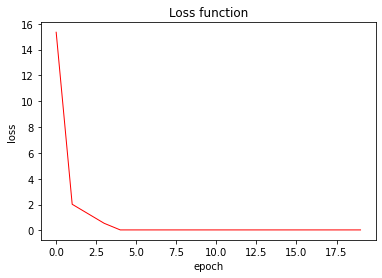

In [18]:
print("\n추정 결과 :")
print("w1 = %.2f" % w1.numpy())
print("w2 = %.2f" % w2.numpy())
print("b = %.2f" % b.numpy())
print("final loss = %.4f" % loss.numpy())

plt.plot(histLoss, color='red', linewidth=1)
plt.title("Loss function")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

# Adam + minimize()

In [30]:
import tensorflow as tf
from tensorflow.keras import optimizers
import numpy as np
import matplotlib.pyplot as plt

# y = 2x^2 + 3x + 5 일 때 x, y 집합을 생성한다
x = np.array(np.arange(-5, 5, 0.1))
y = 2 * x * x + 3 * x + 5

# 그래프를 생성한다.   
w1 = tf.Variable(1.0)
w2 = tf.Variable(1.0)
b = tf.Variable(1.0)

In [31]:
def loss():
    return tf.sqrt(tf.reduce_mean(tf.square(w1*x*x + w2*x + b - y)))

opt = optimizers.Adam(learning_rate=0.001)

histLoss = []
for epoch in range(10000):
    # 로스함수만주면 미분하고 테이프 하고 하는 과정을 간단하게 해준다.
    # 로스 함수 정의 자체를 집어넣어준것
    opt.minimize(loss, var_list = [w1,w2,b])
    
    histLoss.append(loss())
    if epoch % 500 == 0:
        print("epoch = {}, loss = {}".format(epoch, histLoss[-1]))

epoch = 0, loss = 15.327645301818848
epoch = 500, loss = 9.454402923583984
epoch = 1000, loss = 4.246377468109131
epoch = 1500, loss = 1.9247740507125854
epoch = 2000, loss = 1.4152452945709229
epoch = 2500, loss = 1.0947701930999756
epoch = 3000, loss = 0.7711126208305359
epoch = 3500, loss = 0.44227075576782227
epoch = 4000, loss = 0.11060690134763718
epoch = 4500, loss = 0.000905002816580236
epoch = 5000, loss = 0.0009234699537046254
epoch = 5500, loss = 0.0008568525081500411
epoch = 6000, loss = 0.0008003414841368794
epoch = 6500, loss = 0.0007409106474369764
epoch = 7000, loss = 0.0007376551511697471
epoch = 7500, loss = 0.0007144282571971416
epoch = 8000, loss = 0.0007153843180276453
epoch = 8500, loss = 0.0007511757430620492
epoch = 9000, loss = 0.0007269848720170557
epoch = 9500, loss = 0.0007421072223223746



추정 결과 :
w1 = 2.00
w2 = 3.00
b = 5.00


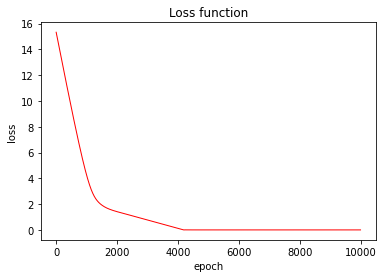

In [32]:
print("\n추정 결과 :")
print("w1 = %.2f" % w1.numpy())
print("w2 = %.2f" % w2.numpy())
print("b = %.2f" % b.numpy())

plt.plot(histLoss, color='red', linewidth=1)
plt.title("Loss function")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

# Keras 
## Sequential model

Epoch 1/300
4/4 [==============================] - 0s 1ms/step - loss: 1695.7695
Epoch 2/300
4/4 [==============================] - 0s 1ms/step - loss: 1509.2710
Epoch 3/300
4/4 [==============================] - 0s 1ms/step - loss: 1337.2599
Epoch 4/300
4/4 [==============================] - 0s 1ms/step - loss: 1179.3746
Epoch 5/300
4/4 [==============================] - 0s 1ms/step - loss: 1037.1084
Epoch 6/300
4/4 [==============================] - 0s 2ms/step - loss: 909.6449
Epoch 7/300
4/4 [==============================] - 0s 2ms/step - loss: 787.5084
Epoch 8/300
4/4 [==============================] - 0s 1ms/step - loss: 680.3973
Epoch 9/300
4/4 [==============================] - 0s 2ms/step - loss: 576.9678
Epoch 10/300
4/4 [==============================] - 0s 2ms/step - loss: 488.4063
Epoch 11/300
4/4 [==============================] - 0s 2ms/step - loss: 411.8109
Epoch 12/300
4/4 [==============================] - 0s 2ms/step - loss: 337.5191
Epoch 13/300
4/4 [==============

4/4 [==============================] - 0s 2ms/step - loss: 0.2577
Epoch 105/300
4/4 [==============================] - 0s 1ms/step - loss: 0.2519
Epoch 106/300
4/4 [==============================] - 0s 1ms/step - loss: 0.2466
Epoch 107/300
4/4 [==============================] - 0s 2ms/step - loss: 0.2409
Epoch 108/300
4/4 [==============================] - 0s 2ms/step - loss: 0.2356
Epoch 109/300
4/4 [==============================] - 0s 1ms/step - loss: 0.2302
Epoch 110/300
4/4 [==============================] - 0s 2ms/step - loss: 0.2249
Epoch 111/300
4/4 [==============================] - 0s 2ms/step - loss: 0.2198
Epoch 112/300
4/4 [==============================] - 0s 2ms/step - loss: 0.2149
Epoch 113/300
4/4 [==============================] - 0s 1ms/step - loss: 0.2103
Epoch 114/300
4/4 [==============================] - 0s 2ms/step - loss: 0.2057
Epoch 115/300
4/4 [==============================] - 0s 2ms/step - loss: 0.2013
Epoch 116/300
4/4 [==============================] - 0

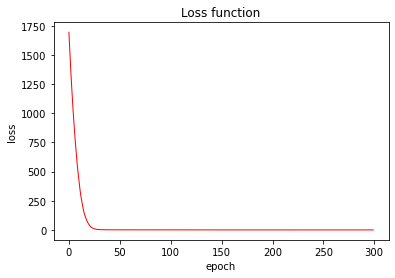

In [36]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras import optimizers
import numpy as np
import matplotlib.pyplot as plt

# y = 2x^2 + 3x + 5 일 때 x, y 집합을 생성한다
x = np.array(np.arange(-5, 5, 0.1))
y = 2 * x * x + 3 * x + 5
dataX = np.stack([x*x, x]).T

# 그래프를 생성한다.
model = Sequential()
model.add(Dense(1, input_dim = 2))
model.compile(loss='mse',optimizer=optimizers.Adam(learning_rate=0.05))

h=model.fit(dataX, y, epochs = 300)

# 학습 결과를 확인한다.
parameters = model.layers[0].get_weights()
print("\n추정 결과 :")
print("w1 = %.2f" % parameters[0][0][0])
print("w2 = %.2f" % parameters[0][1][0])
print("b = %.2f" % parameters[1][0])

plt.plot(h.history['loss'], color='red', linewidth=1)
plt.title("Loss function")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

In [ ]:
## Functional API - 다른 방식으로 해보라는 의미

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/300
10/10 [==============================] - 0s 2ms/step - loss: 418.1307
Epoch 2/300
10/10 [==============================] - 0s 1ms/step - loss: 223.5322
Epoch 3/300
10/10 [==============================] - 0s 1ms/step - loss: 111.3737
Epoch 4/300
10/10 [==============================] - 0s 1ms/step - loss: 49.5991
Epoch 5/300
10/10 [==============================] - 0s 1ms/step - loss: 29.5293
Epoch 6/300
10/10 [==============================] - 0s 1ms/step - loss: 19.1584
Epoch 7/300
10/10 [==============================] - 0s 1ms/step - loss: 13.7161
Epoch 8/300
10/10 [==============================] - 0s 2ms/step - loss: 9.4509
Epoch 9/300
10/10 [==============================] - 0s 2ms/step - loss: 6.5463
Epoch 10/300
10/10 [==============================] - 0s 2ms/step - loss: 4.8736
Epoch 11/300
10/10 [==============================] - 0s 1ms/step - loss: 3.9100
Epoch 12/300
10/10 [==============================] - 0s 1ms/step - loss: 3.2874
Epoch 13/300
10/10 [=======

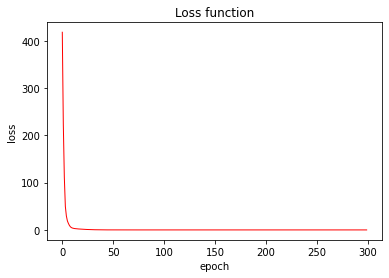

In [ ]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras import optimizers
import numpy as np
import matplotlib.pyplot as plt

# y = 2x^2 + 3x + 5 일 때 x, y 집합을 생성한다
x = np.array(np.arange(-5, 5, 0.1))
y = 2 * x * x + 3 * x + 5
dataX = np.stack([x*x, x]).T

# 그래프를 생성한다.   


# 학습 결과를 확인한다.
parameters = model.layers[1].get_weights()
print("\n추정 결과 :")
print("w1 = %.2f" % parameters[0][0][0])
print("w2 = %.2f" % parameters[0][1][0])
print("b = %.2f" % parameters[1][0])

plt.plot(h.history['loss'], color='red', linewidth=1)
plt.title("Loss function")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

# tensorflow 1.4로 iris 분류 ( 과거 논문을 볼때 알아 두면 좋은 코드)

In [37]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [38]:
import numpy as np
import pandas as pd
from sklearn import datasets

In [39]:
iris = datasets.load_iris()
iris_X = iris.data
iris_y = pd.get_dummies(iris.target).to_numpy()

In [40]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(iris_X, iris_y, 
                                                    test_size=0.3,
                                                    random_state=1)

In [41]:
# X와 y를 저장할 변수 선언
x = tf.placeholder(tf.float32, [None, 4]) # 변수 수가 4개
y = tf.placeholder(tf.float32, [None, 3]) # 분류 클래스 수가 3개

In [42]:
# Weight와 bias를 저장할 변수 선언
W = tf.Variable(tf.zeros([4, 3]))
b = tf.Variable(tf.zeros([3]))

In [ ]:
# 출력을 정의
h = tf.nn.softmax(tf.matmul(x, W) + b)

In [ ]:
# 손실함수 정의
cross_entropy = -tf.reduce_sum(y*tf.log(h), reduction_indices=[1])
loss = tf.reduce_mean(cross_entropy)

In [ ]:
# 학습(훈련) 정의(옵티마이저, 학습률)
train = tf.train.GradientDescentOptimizer(0.001).minimize(loss)

In [ ]:
init = tf.global_variables_initializer()

In [ ]:
sess = tf.Session()
sess.run(init)

In [ ]:
for i in range(100000):
    _, loss_value = sess.run([train, loss], feed_dict={x:train_X, y:train_y})
    if i%10000 == 0:
        print(i, loss_value)

0 1.0986123
10000 0.34161025
20000 0.25733852
30000 0.21406321
40000 0.18752664
50000 0.16956551
60000 0.15657532
70000 0.14672598
80000 0.13898851
90000 0.13273858


In [ ]:
correct_prediction = tf.equal(tf.argmax(h, 1), tf.argmax(y, 1))

In [ ]:
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [ ]:
print(sess.run(accuracy, feed_dict={x:test_X, y:test_y}))

0.9777778


# Keras 

In [ ]:
import tensorflow as tf

In [ ]:
# example of a model defined with the sequential api
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers

In [ ]:
%time


CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.96 µs
Test Accuracy: 0.933


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2426: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


In [ ]:

%time


CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.48 µs
Test Accuracy: 1.000


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2426: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


# Functional API

In [ ]:
i     = Input(shape=(n_features,)) # 입력레이어
n     = Dense(10)(i)
n     = Dense(8)(n)
o     = Dense(3, activation='softmax')(n) # 출력레이어
model = Model(inputs=i, outputs=o) # 모델을 만든다

In [ ]:
%time


CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.63 µs
Test Accuracy: 1.000


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2426: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '
